In [1]:
import pickle
import pandas as pd
import os
import geopy
import geopandas as gpd

import sys
sys.path.append("../")
import src.supportClean as sc

import sys
sys.path.append("../")
import src.bibliotheque as bb

import sys
sys.path.append("../")
import src.supportCharts as sch

# data input

In [2]:
path = '../data/fotocasa/'

In [3]:
df_fotocasa = sc.openMultiplePickles(path)
print(df_fotocasa.shape)
df_fotocasa.head()

(5842, 9)


name         price   
0  Apartamento con aire acondicionado en Calle de...  2.860 € /mes  \
1  Apartamento con calefacción en Calle de Precia...  2.167 € /mes   
2  Apartamento con calefacción en Calle de Arriaz...  2.170 € /mes   
3  Apartamento con calefacción en Avenida de la C...  1.513 € /mes   
4  Apartamento con calefacción en Conde de Romano...  1.701 € /mes   

                                             address   
0      [,  calefacción en Calle de la Unión, Centro]  \
1     [,  calefacción en Calle de Preciados, Centro]   
2  [,  calefacción en Calle de Arriaza, Moncloa -...   
3  [,  calefacción en Avenida de la Ciudad de Bar...   
4     [,  calefacción en Conde de Romanones, Centro]   

                                               owner   
0  https://www.fotocasa.es/es/inmobiliaria-homeli...  \
1  https://www.fotocasa.es/es/inmobiliaria-homeli...   
2  https://www.fotocasa.es/es/inmobiliaria-homeli...   
3  https://www.fotocasa.es/es/inmobiliaria-homeli...   
4  https://www.fotocasa.es/es/inmobiliaria-homeli...   

                                                 url   
0  https://www.fotocasa.es/es/alquiler/vivienda/m...  \
1  https://www.fotocasa.es/es/alquiler/vivienda/m...   
2  https://www.fotocasa.es/es/alquiler/vivienda/m...   
3  https://www.fotocasa.es/es/alquiler/vivienda/m...   
4  https://www.fotocasa.es/es/alquiler/vivienda/m...   

                                         amenities  element  page   
0  2 habs.\n1 baño\n180 m²\nPrincipal\nCalefacción        1    19  \
1        1 hab.\n1 baño\n65 m²\nBajos\nCalefacción        2    19   
2   1 hab.\n1 baño\n70 m²\nEntresuelo\nCalefacción        3    19   
3    1 hab.\n1 baño\n67 m²\n2ª Planta\nCalefacción        4    19   
4  2 habs.\n1 baño\n60 m²\nEntresuelo\nCalefacción        5    19   

                 dateScraped  
0 2023-04-12 18:36:38.060615  
1 2023-04-12 18:36:56.322321  
2 2023-04-12 18:37:12.994296  
3 2023-04-12 18:37:28.305157  
4 2023-04-12 18:37:44.508658

# data cleaning
## address

In [4]:
df_fotocasa['name'][14]

'Apartamento con 1 baño en Calle Rufino Blanco, Barrio de Salamanca\n1.800 € /mes'

In [5]:
df_fotocasa['address_clean'] = df_fotocasa['name'].str.lower().str.findall(r'en (.*)\n').explode() + ', madrid, españa'
df_fotocasa['address_clean'].value_counts()

address_clean
centro, madrid, españa                          262
barrio de salamanca, madrid, españa             227
chamartín, madrid, españa                       207
tetuán, madrid, españa                          136
chamberí, madrid, españa                        124
                                               ... 
divino valles, arganzuela, madrid, españa         1
belzunegui, carabanchel, madrid, españa           1
feria, san blas, madrid, españa                   1
andrés mellado, chamberí, madrid, españa          1
calle de doña urraca, latina, madrid, españa      1
Name: count, Length: 2012, dtype: int64

There will be some apartments that won't have a reliable geolocation due to the desciption of the location being quite vague.

In [6]:
df_fotocasa[df_fotocasa['address_clean'] == 'centro'].head()

Empty DataFrame
Columns: [name, price, address, owner, url, amenities, element, page, dateScraped, address_clean]
Index: []

## owner

In [7]:
df_fotocasa['owner_clean'] = df_fotocasa['owner'].str.lower().str.findall(r'https://www.fotocasa.es/es/inmobiliaria-(.*)/alquiler').explode().str.replace('-', ' ')
df_fotocasa['owner_clean'].value_counts()

owner_clean
homelike                                             892
area casa                                            810
ukio                                                 210
agencia negociadora del alquiler                     150
renta garantizada sa                                 150
alquila tu hogar                                     150
aproperties real estate madrid                       120
roomless                                             120
alquiler seguro                                      120
engel volkers madrid                                 120
inmosai                                               90
mosaic inmobiliaria                                   90
solvia inmobiliaria                                   60
elephant real estate                                  60
astondo real estate                                   60
live 4 life                                           60
scala properties                                      60
housfy             

## name

In [8]:
df_fotocasa.tail()

name         price   
5837  Piso con 1 baño en Taquigrafia, San Blas\n825 ...    825 € /mes  \
5838  Piso con aire acondicionado en San Onofre, Cen...  2.100 € /mes   
5839  Apartamento con aire acondicionado en Calle de...  1.078 € /mes   
5840  Piso con 1 baño en Calle de Cebreros, Latina\n...    850 € /mes   
5841  Piso en Jose Tamayo, Villa de Vallecas\n955 € ...    955 € /mes   

                                                address owner   
5837                 [ 1 baño en Taquigrafia, San Blas]        \
5838        [ aire acondicionado en San Onofre, Centro]         
5839  [,  aire acondicionado en Calle de Doña Urraca...         
5840             [ 1 baño en Calle de Cebreros, Latina]         
5841                                                 []         

                                                    url   
5837  https://www.fotocasa.es/es/alquiler/vivienda/m...  \
5838  https://www.fotocasa.es/es/alquiler/vivienda/m...   
5839  https://www.fotocasa.es/es/alquiler/vivienda/m...   
5840  https://www.fotocasa.es/es/alquiler/vivienda/m...   
5841  https://www.fotocasa.es/es/alquiler/vivienda/m...   

                                            amenities  element  page   
5837                2 habs.\n1 baño\n57 m²\n4ª Planta       26    11  \
5838  3 habs.\n2 baños\n95 m²\n3ª Planta\nCalefacción       27    11   
5839       1 hab.\n1 baño\n35 m²\nSótano\nCalefacción       28    11   
5840                2 habs.\n1 baño\n59 m²\n1ª Planta       29    11   
5841      2 habs.\n1 baño\n66 m²\n4ª Planta\nAscensor       30    11   

                    dateScraped   
5837 2023-04-12 16:14:24.481695  \
5838 2023-04-12 16:14:37.530981   
5839 2023-04-12 16:14:51.001228   
5840 2023-04-12 16:15:23.311166   
5841 2023-04-12 16:15:36.461862   

                                       address_clean owner_clean  
5837           taquigrafia, san blas, madrid, españa         NaN  
5838              san onofre, centro, madrid, españa         NaN  
5839    calle de doña urraca, latina, madrid, españa         NaN  
5840       calle de cebreros, latina, madrid, españa         NaN  
5841  jose tamayo, villa de vallecas, madrid, españa         NaN

In [9]:
df_fotocasa['name_clean'] = df_fotocasa['name'].str.lower().str.findall(r'(.*)\n.*€ /mes').explode()#.str.replace('-', ' ')
df_fotocasa['name_clean'].value_counts()

name_clean
piso con ascensor en barrio de salamanca                              100
piso con balcón en centro                                              90
piso con ascensor en chamartín                                         81
piso con ascensor en centro                                            78
piso con terraza en chamartín                                          54
                                                                     ... 
piso con ascensor en san german, tetuán                                 1
ático con terraza en del ensanche de vallecas, villa de vallecas        1
piso con terraza en calle ramón azorín, latina                          1
estudio con ascensor en calle del pintor juan gris, tetuán              1
apartamento con aire acondicionado en calle de doña urraca, latina      1
Name: count, Length: 2614, dtype: int64

In [10]:
df_fotocasa['price_clean'] = pd.to_numeric(df_fotocasa['price'].str.replace(' € /mes', '').replace('.', ''))
df_fotocasa['price_clean'].value_counts()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas/_libs/lib.pyx", line 2280, in pandas._libs.lib.maybe_convert_numeric
ValueError: Unable to parse string "A consultar"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/iron2/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/m6/wtrz4vsj7cv881kk9kqh1v500000gn/T/ipykernel_2526/361448908.py", line 1, in <module>
    df_fotocasa['price_clean'] = pd.to_numeric(df_fotocasa['price'].str.replace(' € /mes', '').replace('.', ''))
  File "/opt/homebrew/Caskroom/miniforge/base/envs/iron2/lib/python3.9/site-packages/pandas/core/tools/numeric.py", line 217, in to_numeric
    values, new_mask = lib.maybe_convert_numeric(  # type: ignore[call-overload]  # noqa
  File "pandas/_libs/lib.pyx", line 2322, in pandas._libs.lib.maybe_convert_numer

In [11]:
df_fotocasa['price'].str.replace('.', '').str.extract(r'(.*) € /mes')#.replace({'.':''})

0
0     2860
1     2167
2     2170
3     1513
4     1701
...    ...
5837   825
5838  2100
5839  1078
5840   850
5841   955

[5842 rows x 1 columns]

In [26]:
df_fotocasa['price_clean_fc'] = (df_fotocasa['price'].str.replace('.', '').str.extract(r'(.*) € /mes')).astype(int)
df_fotocasa['min_price_fc'] = df_fotocasa['price_clean_fc']
df_fotocasa['max_price_fc'] = df_fotocasa['price_clean_fc']
df_fotocasa['med_price_fc'] = df_fotocasa['price_clean_fc']
df_fotocasa['avg_price_fc'] = df_fotocasa['price_clean_fc']
df_fotocasa.head()

price                                                url   
0  2.860 € /mes  https://www.fotocasa.es/es/alquiler/vivienda/m...  \
1  2.167 € /mes  https://www.fotocasa.es/es/alquiler/vivienda/m...   
2  2.170 € /mes  https://www.fotocasa.es/es/alquiler/vivienda/m...   
3  1.513 € /mes  https://www.fotocasa.es/es/alquiler/vivienda/m...   
4  1.701 € /mes  https://www.fotocasa.es/es/alquiler/vivienda/m...   

                                       address_clean owner_clean   
0          calle de la unión, centro, madrid, españa    homelike  \
1         calle de preciados, centro, madrid, españa    homelike   
2  calle de arriaza, moncloa - aravaca, madrid, e...    homelike   
3  avenida de la ciudad de barcelona, retiro, mad...    homelike   
4         conde de romanones, centro, madrid, españa    homelike   

                                          name_clean  price_clean_fc   
0  apartamento con aire acondicionado en calle de...            2860  \
1  apartamento con calefacción en calle de precia...            2167   
2  apartamento con calefacción en calle de arriaz...            2170   
3  apartamento con calefacción en avenida de la c...            1513   
4  apartamento con calefacción en conde de romano...            1701   

   min_price_fc  max_price_fc  med_price_fc                          point   
0          2860          2860          2860  (40.4172676, -3.7104333, 0.0)  \
1          2167          2167          2167   (40.418129, -3.7046339, 0.0)   
2          2170          2170          2170  (40.4218317, -3.7163685, 0.0)   
3          1513          1513          1513  (40.3985347, -3.6696146, 0.0)   
4          1701          1701          1701  (40.4123882, -3.7049448, 0.0)   

    latitude  longitude  altitude  
0  40.417268  -3.710433       0.0  
1  40.418129  -3.704634       0.0  
2  40.421832  -3.716369       0.0  
3  40.398535  -3.669615       0.0  
4  40.412388  -3.704945       0.0

In [13]:
df_fotocasa = df_fotocasa[df_fotocasa['price_clean_fc'].isnull() == False]

# geolocation

In [14]:
df_fotocasa_geolocated = sc.geolocation(df_fotocasa, 'address_clean')

  3%|▎         | 169/5830 [02:47<1:34:55,  1.01s/it]RateLimiter caught an error, retrying (0/2 tries). Called with (*('calle del 7 de julio, centro, madrid, españa',), **{}).
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/iron2/lib/python3.9/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/opt/homebrew/Caskroom/miniforge/base/envs/iron2/lib/python3.9/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/iron2/lib/python3.9/http/client.py", line 1377, in getresponse
    response.begin()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/iron2/lib/python3.9/http/client.py", line 320, in begin
    version, status, reason = self._read_status()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/iron2/lib/python3.9/http/client.py", line 281, in _read_

In [15]:
df_fotocasa_geolocated.drop(['name', 'owner',  'location', 'address', 'amenities', 'element',	'page',	'dateScraped'], axis =1, inplace=True)

In [29]:
df_fotocasa_geolocated.dtypes

price              object
url                object
address_clean      object
owner_clean        object
name_clean         object
price_clean_fc     object
min_price_fc       object
max_price_fc       object
med_price_fc       object
point              object
latitude          float64
longitude         float64
altitude          float64
dtype: object

# EDA

In [31]:
sch.analisis_basico(df_fotocasa_geolocated)

_________________________________

1_Data Structure: (4821, 13)


price                                                url   
0  2.860 € /mes  https://www.fotocasa.es/es/alquiler/vivienda/m...  \
1  2.167 € /mes  https://www.fotocasa.es/es/alquiler/vivienda/m...   

                                address_clean owner_clean   
0   calle de la unión, centro, madrid, españa    homelike  \
1  calle de preciados, centro, madrid, españa    homelike   

                                          name_clean  price_clean_fc   
0  apartamento con aire acondicionado en calle de...            2860  \
1  apartamento con calefacción en calle de precia...            2167   

   min_price_fc  max_price_fc  med_price_fc                          point   
0          2860          2860          2860  (40.4172676, -3.7104333, 0.0)  \
1          2167          2167          2167   (40.418129, -3.7046339, 0.0)   

    latitude  longitude  altitude  
0  40.417268  -3.710433       0.0  
1  40.418129  -3.704634       0.0

<class 'pandas.core.frame.DataFrame'>
Index: 4821 entries, 0 to 5841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           4821 non-null   object 
 1   url             4821 non-null   object 
 2   address_clean   4821 non-null   object 
 3   owner_clean     4010 non-null   object 
 4   name_clean      4821 non-null   object 
 5   price_clean_fc  4821 non-null   int64  
 6   min_price_fc    4821 non-null   int64  
 7   max_price_fc    4821 non-null   int64  
 8   med_price_fc    4821 non-null   int64  
 9   point           4821 non-null   object 
 10  latitude        4821 non-null   float64
 11  longitude       4821 non-null   float64
 12  altitude        4821 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 527.3+ KB


None

_________________________________

2_Duplicated columns:
720
_________________________________

3_Null values distribution:


price     url address_clean owner_clean name_clean price_clean_fc   
nulos        0       0             0         811          0              0  \
dtypes  object  object        object      object     object          int64   

       min_price_fc max_price_fc med_price_fc   point latitude longitude   
nulos             0            0            0       0        0         0  \
dtypes        int64        int64        int64  object  float64   float64   

       altitude  
nulos         0  
dtypes  float64

_________________________________

4_Numerical variables distribution:


price_clean_fc   min_price_fc   max_price_fc   med_price_fc   
count     4821.000000    4821.000000    4821.000000    4821.000000  \
mean      1886.488903    1886.488903    1886.488903    1886.488903   
std       3314.318326    3314.318326    3314.318326    3314.318326   
min        500.000000     500.000000     500.000000     500.000000   
25%       1100.000000    1100.000000    1100.000000    1100.000000   
50%       1540.000000    1540.000000    1540.000000    1540.000000   
75%       2200.000000    2200.000000    2200.000000    2200.000000   
max     215000.000000  215000.000000  215000.000000  215000.000000   

          latitude    longitude  altitude  
count  4821.000000  4821.000000    4821.0  
mean     40.430482    -3.692514       0.0  
std       0.035228     0.033598       0.0  
min      40.257821    -3.795852       0.0  
25%      40.411150    -3.707955       0.0  
50%      40.429356    -3.698281       0.0  
75%      40.451925    -3.676129       0.0  
max      40.556346    -3.546758       0.0

_________________________________

5_Categorical variables distribution:


price                                                url   
count           4821                                               4821  \
unique           529                                               3407   
top     1.100 € /mes  https://www.fotocasa.es/es/alquiler/vivienda/m...   
freq             202                                                 10   

                 address_clean owner_clean   
count                     4821        4010  \
unique                    1540          59   
top     centro, madrid, españa    homelike   
freq                       262         785   

                                      name_clean   
count                                       4821  \
unique                                      2048   
top     piso con ascensor en barrio de salamanca   
freq                                         100   

                                               point  
count                                           4821  
unique                                          1330  
top     (40.417652700000005, -3.70795469569446, 0.0)  
freq                                             262

numeric variables distribution


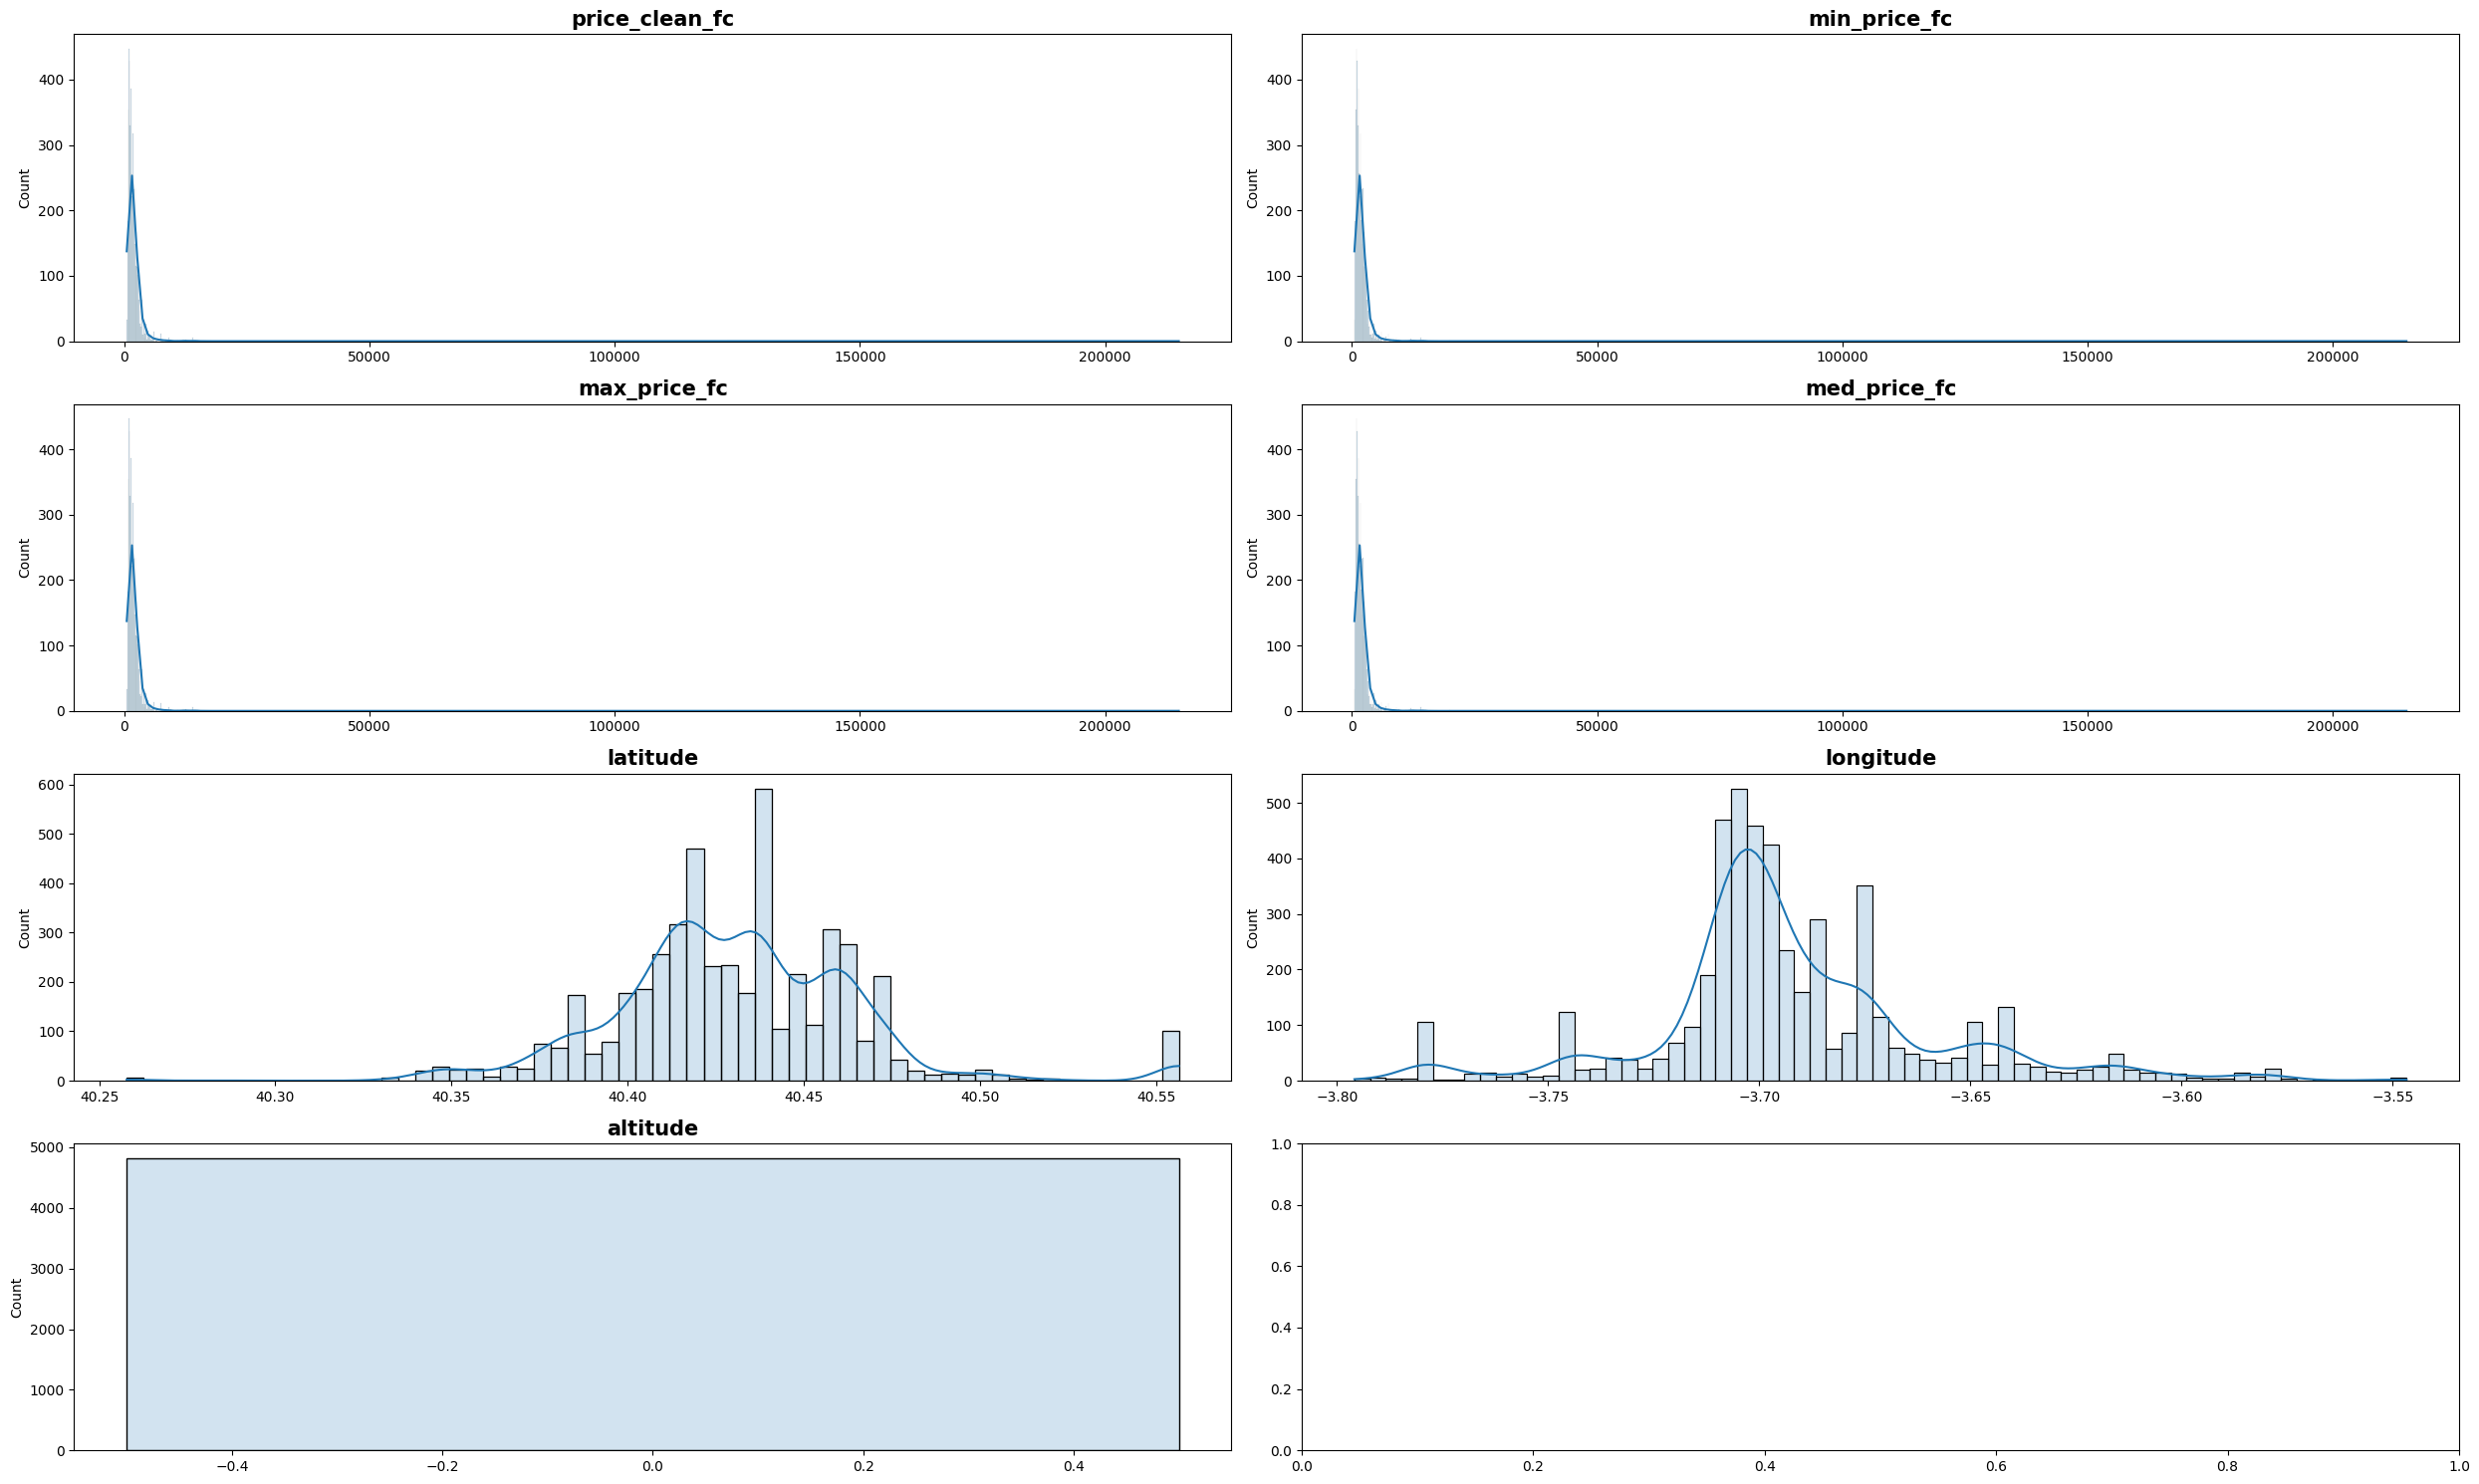

In [32]:
sch.distribucion_numericas(df_fotocasa_geolocated)

numeric variables distribution -> outliers


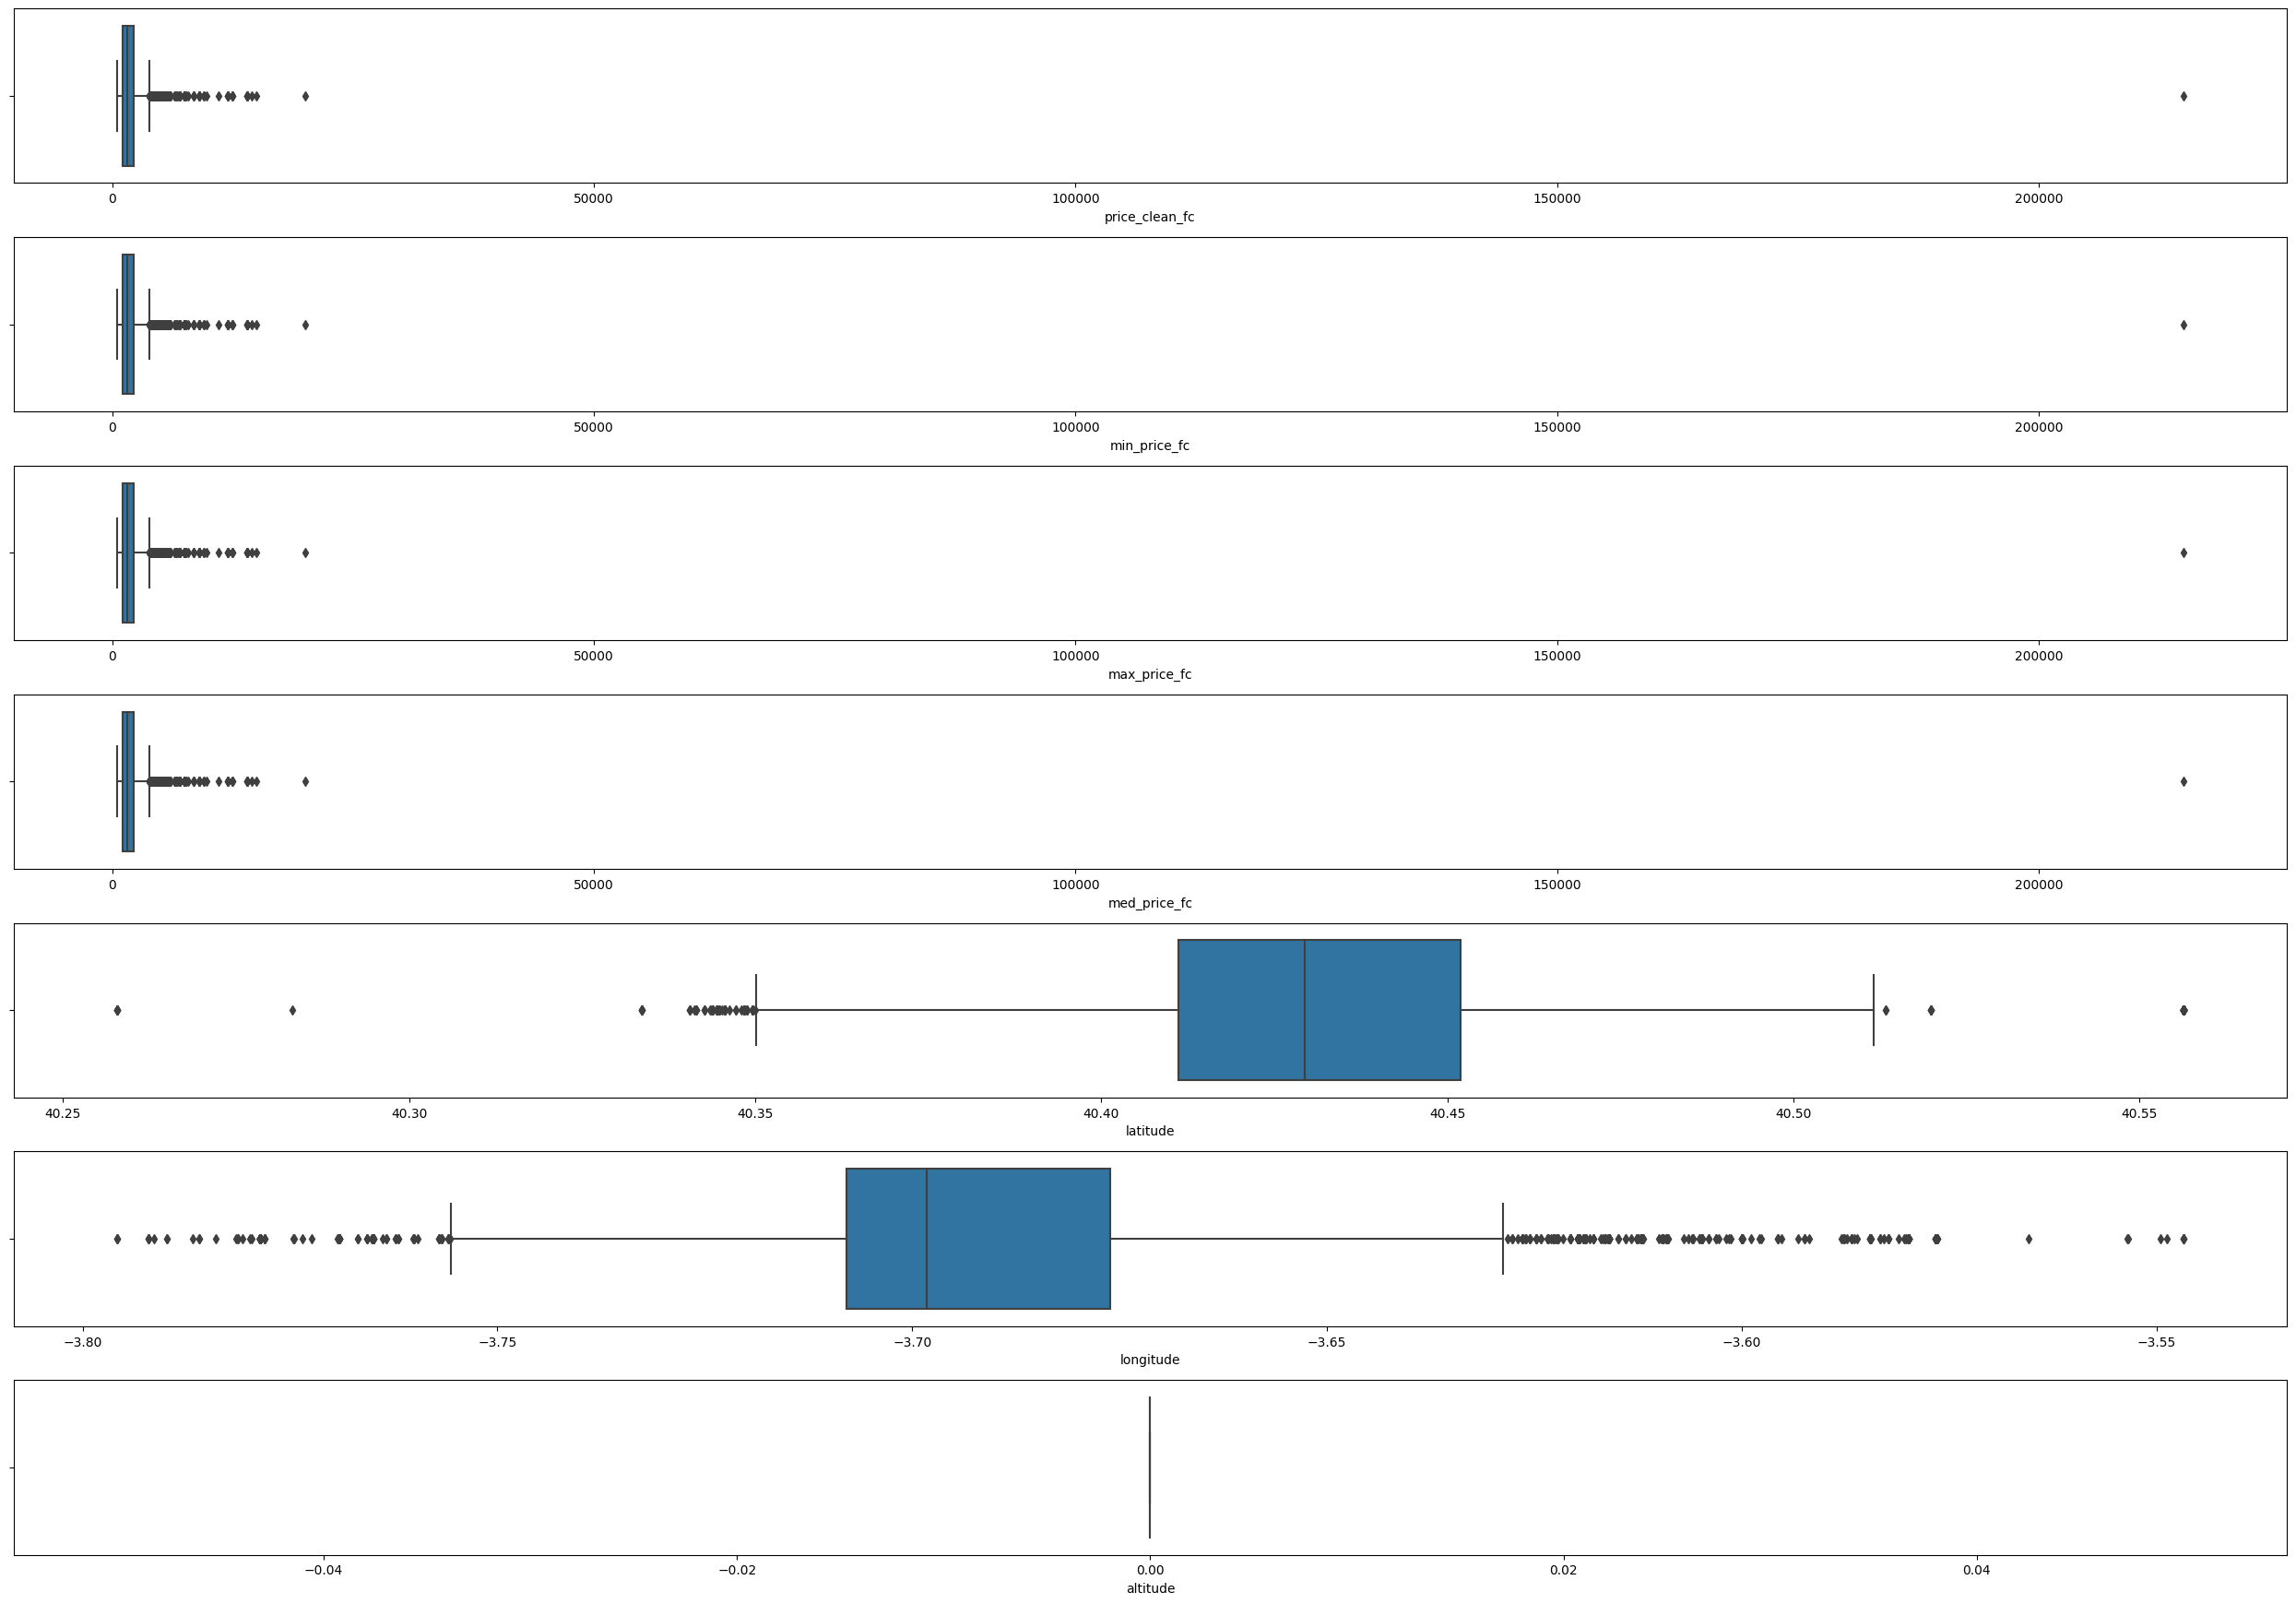

In [33]:
sch.chart_boxplot(df_fotocasa_geolocated)

There are some points that have outliers on the location column. We will drop them in order to keep the values within the city of Madrid.

In [34]:
print(df_fotocasa_geolocated.shape)

(4821, 13)


In [35]:
df_fotocasa_geolocated = df_fotocasa_geolocated[df_fotocasa_geolocated['latitude'] < 42]
df_fotocasa_geolocated = df_fotocasa_geolocated[df_fotocasa_geolocated['longitude'] < 0]

In [36]:
print(df_fotocasa_geolocated.shape)

(4821, 13)


In [37]:
gdf_fotocasa_geolocated = gpd.GeoDataFrame(df_fotocasa_geolocated, geometry=gpd.points_from_xy(df_fotocasa_geolocated.longitude, df_fotocasa_geolocated.latitude)).set_crs('epsg:4326')

In [38]:
sch.foliumMap(gdf_fotocasa_geolocated, 'points')

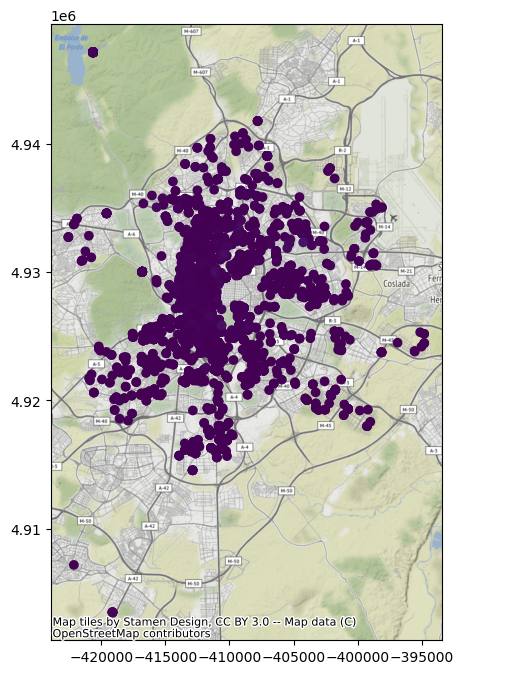

In [40]:
sch.plotMap(gdf_fotocasa_geolocated, 'price_clean_fc')

# Export

In [41]:
sc.exportFiles(gdf_fotocasa_geolocated.drop(['point'], axis = 1), df_fotocasa_geolocated, 'fotocasa')